# Sprint 17: SQL basics

#### Imports

In [7]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from IPython.display import Image

## Level 1

### Exercise 1

#### Create relation database

##### Content:
- table of enterprises
- table of employees
- table of clients
- table of products
- table of types of products
- table of transactions

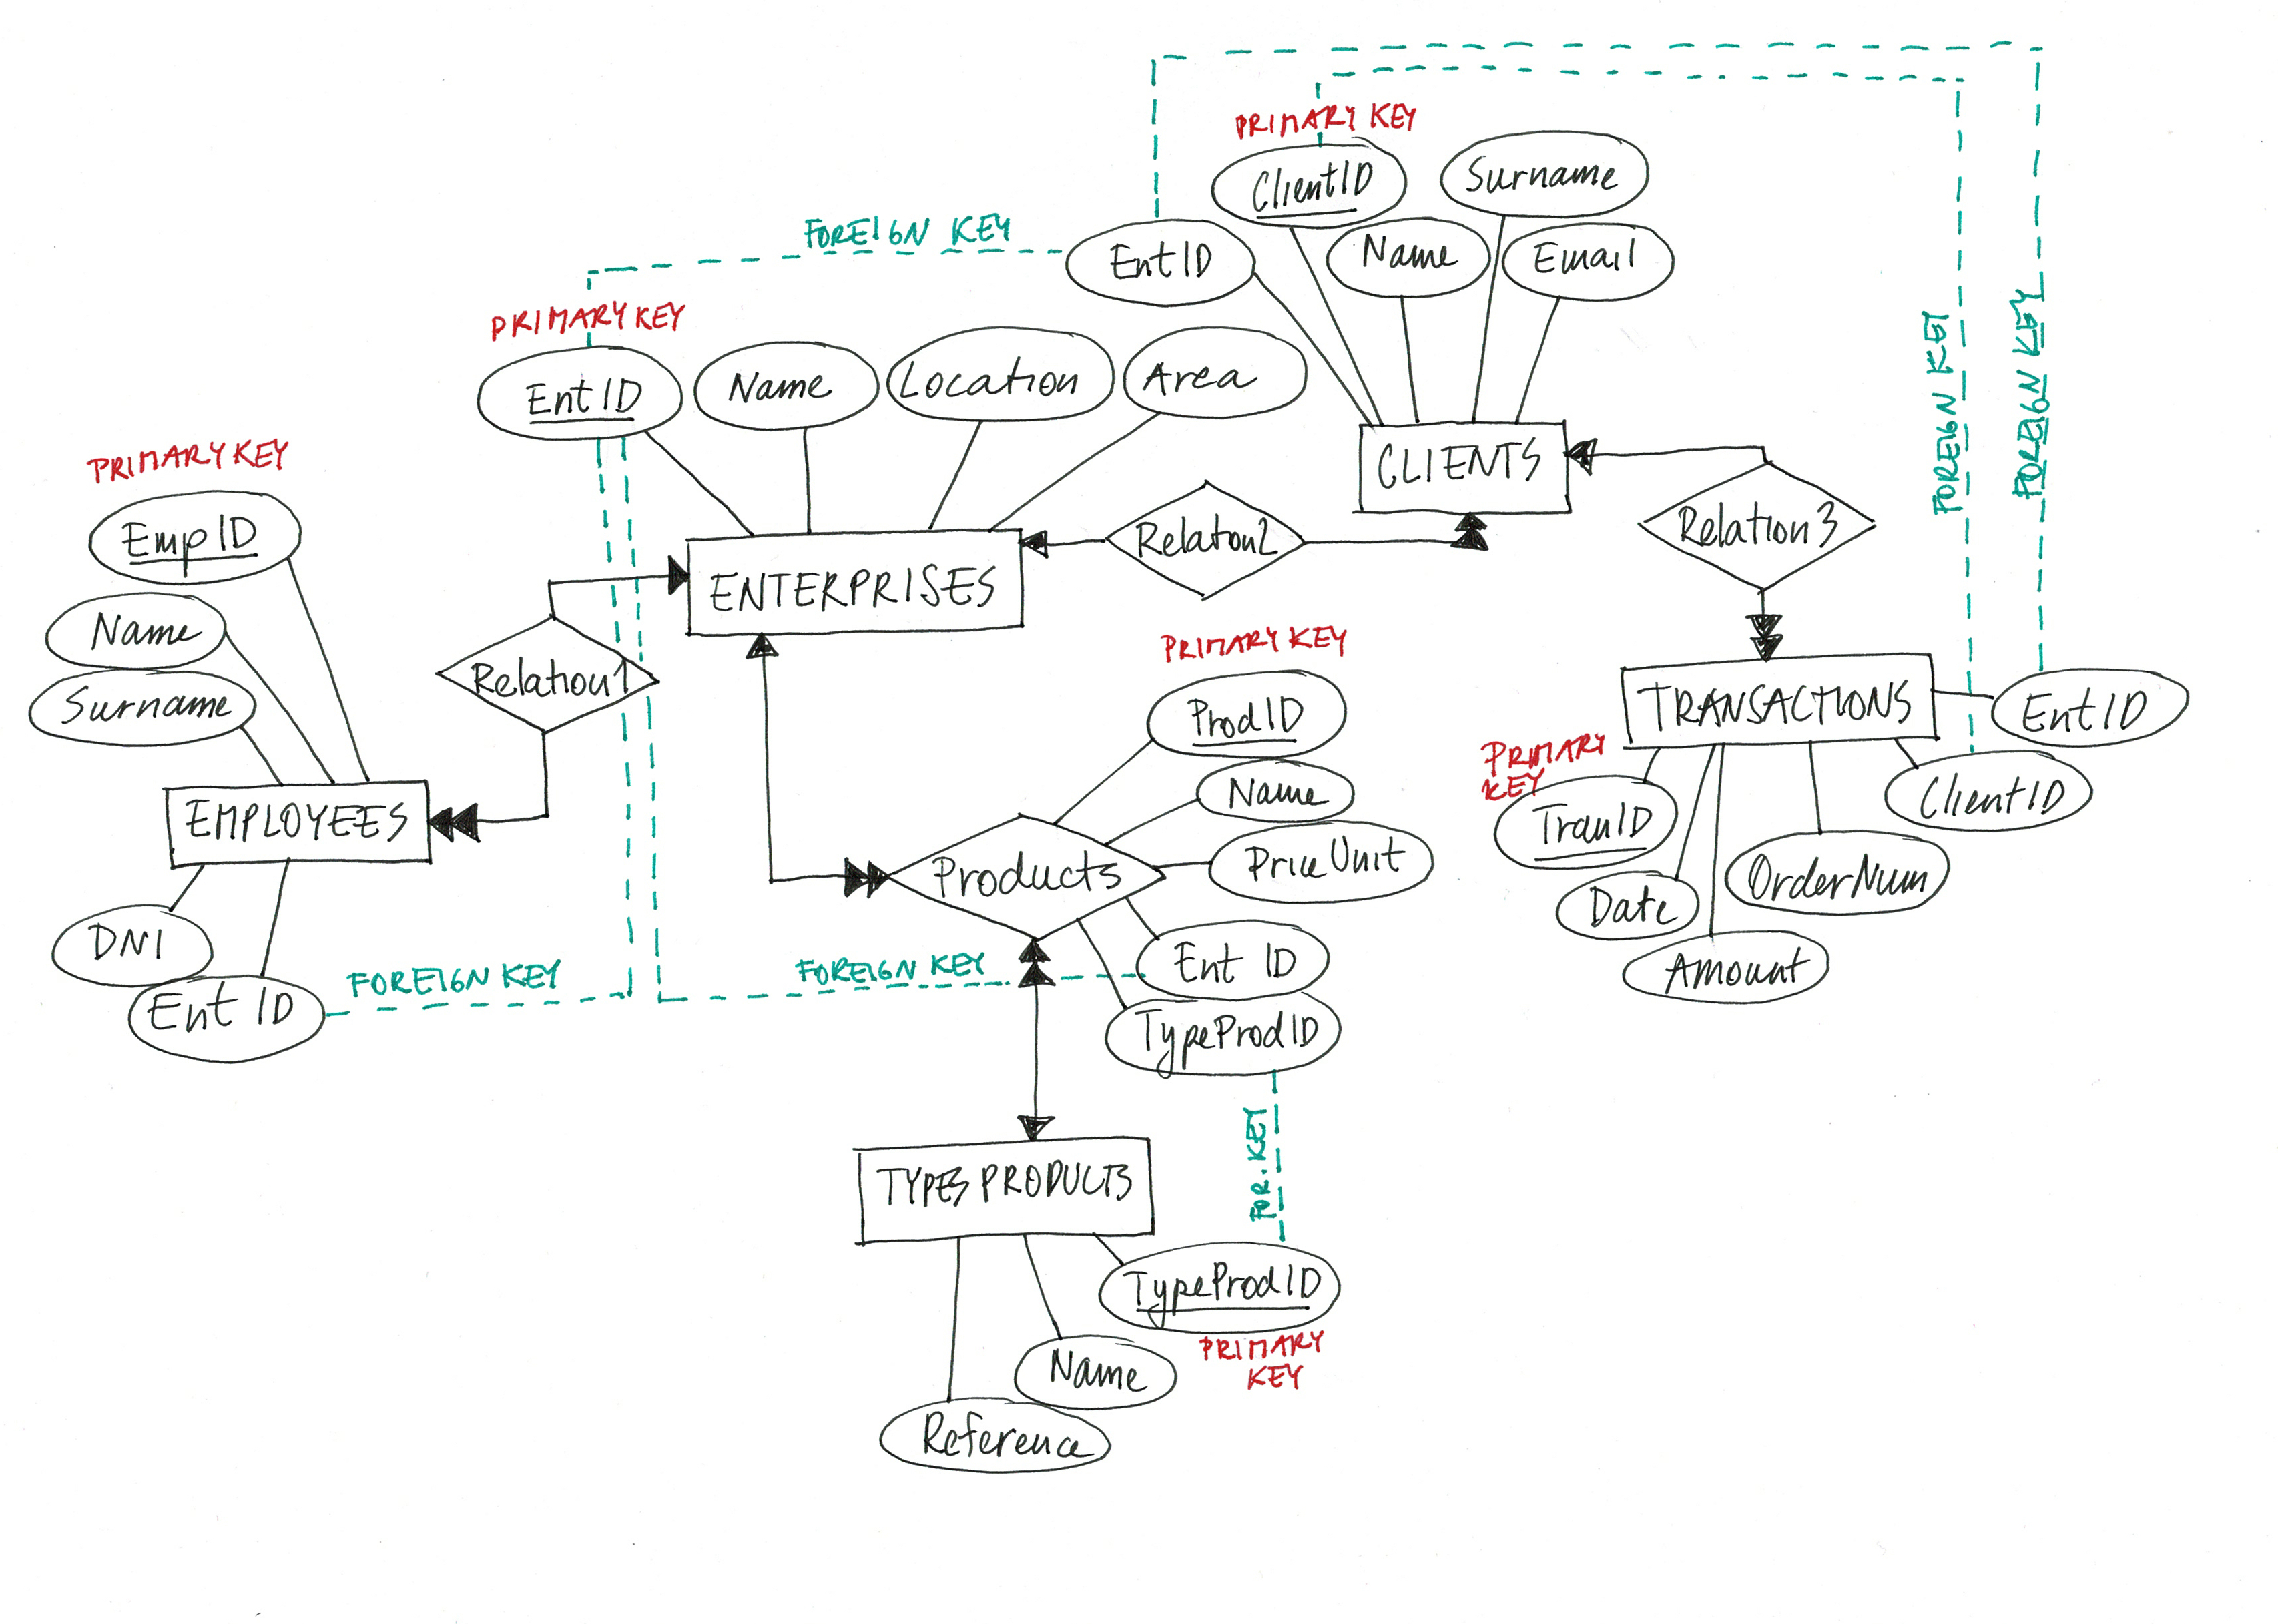

In [14]:
Image(filename='mydatabase1.jpg')

##### Relations:
- 1:N One enterprise has many employees
- 1:N One enterprise has many clients
- N:M Multiple enterprises has multiple products - join table Products
    - 1:N One enterprise has many products
    - 1:N One type of product has many products
- 1:N One enterprise has many transactions
- 1:N One client has relation with many transactions

## Level 2

### Exercise 2

#### Create a diagram

Diagram made online at: https://drawsql.app

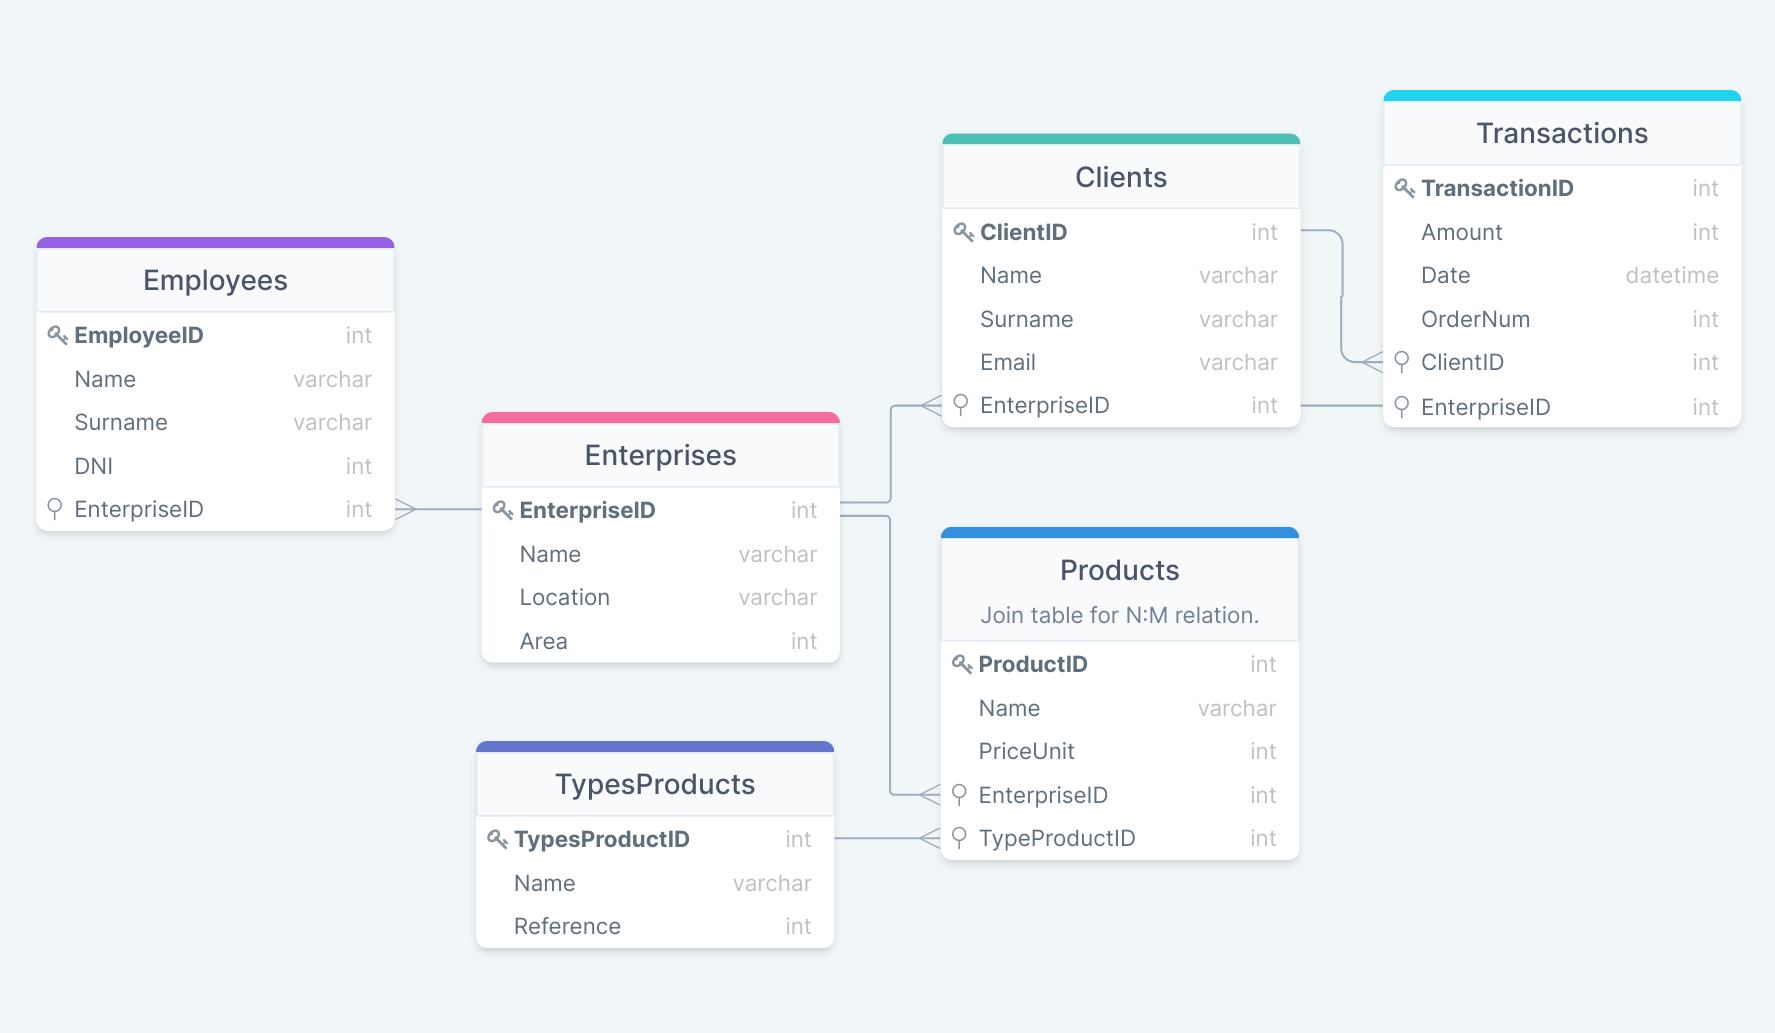

In [16]:
Image(filename='mydatabase2.jpg')

## Level 3

### Exercise 3

#### Use Workbench for creating relational model

We can use Database Reverse Engineer to draw a diagram of relations.

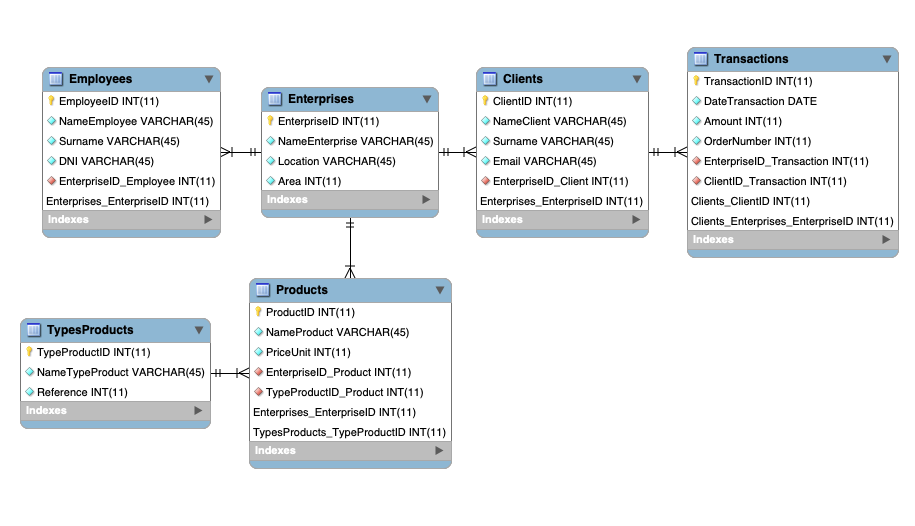

In [18]:
Image(filename='mydatabase3.jpg')

Using Query in MySQL Workbench to insert data into tables.

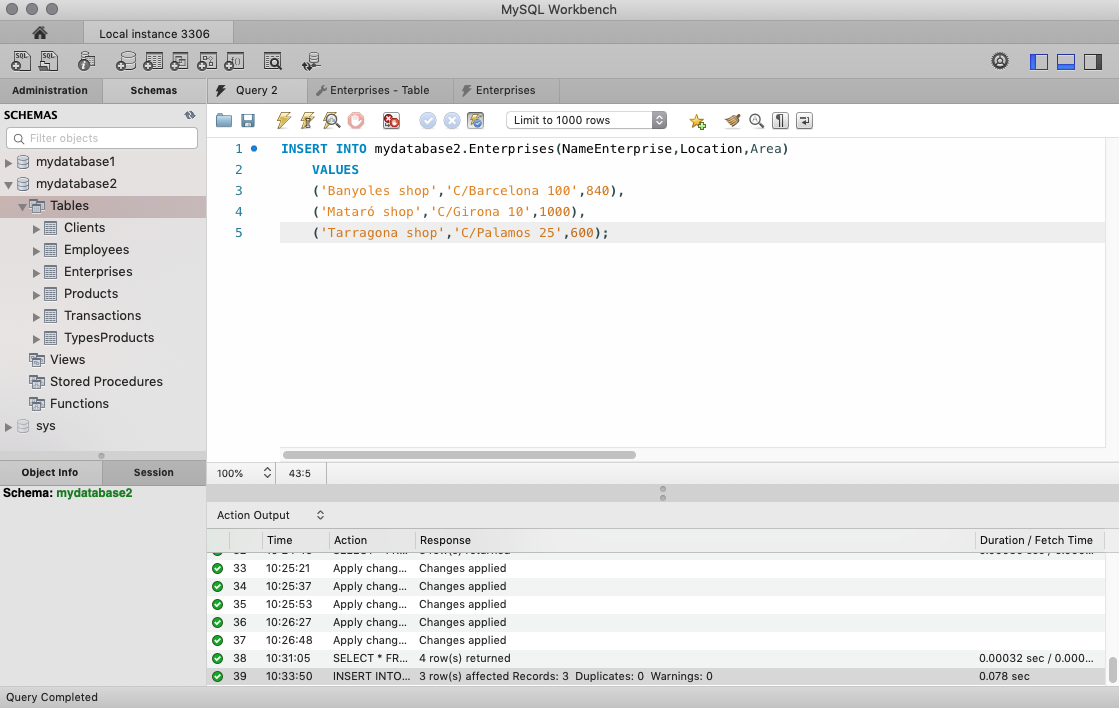

In [19]:
Image(filename='mydatabase4.jpg')

In [20]:
#connecting to MySQL locally
db = mysql.connector.connect(
     host="localhost",
     user="root",
     password="AnticRoca32",
    )

print(db)

Now I can access mydatabase2 from my notebook.

In [21]:
mycursor = db.cursor()
mycursor.execute("USE mydatabase2")

In [22]:
#select all
mycursor.execute("SELECT * FROM Transactions")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, datetime.date(2021, 11, 20), 250, 202101, 1, 1)
(2, datetime.date(2021, 11, 20), 150, 202101, 2, 1)
(3, datetime.date(2021, 11, 20), 550, 202101, 3, 2)
(4, datetime.date(2021, 11, 20), 450, 202101, 1, 3)
(5, datetime.date(2021, 11, 20), 250, 202101, 2, 3)


In [23]:
#select some columns
mycursor.execute("SELECT DISTINCT NameEnterprise, Area FROM Enterprises")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

('Girona shop', 600)
('Barcelona shop', 1600)
('Palamos shop', 400)
('Nom', 202)
('Banyoles shop', 840)
('Mataró shop', 1000)
('Tarragona shop', 600)


In [24]:
#condition
mycursor.execute("SELECT * FROM Transactions WHERE ClientID_Transaction = 3")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(4, datetime.date(2021, 11, 20), 450, 202101, 1, 3)
(5, datetime.date(2021, 11, 20), 250, 202101, 2, 3)


These two transactions where made by client with ID 3.

In [25]:
#order by - transactions from low to high
mycursor.execute("SELECT * FROM Transactions ORDER BY Amount")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(2, datetime.date(2021, 11, 20), 150, 202101, 2, 1)
(1, datetime.date(2021, 11, 20), 250, 202101, 1, 1)
(5, datetime.date(2021, 11, 20), 250, 202101, 2, 3)
(4, datetime.date(2021, 11, 20), 450, 202101, 1, 3)
(3, datetime.date(2021, 11, 20), 550, 202101, 3, 2)


In [31]:
mycursor.execute("SELECT * FROM Clients")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Lorena', 'Garcia Martinez', 'Lorena@gmail.com', 3)
(2, 'Jaume', 'Lopez Martin', 'Jaume@gmail.com', 2)
(3, 'Rafael', 'Diaz Romero', 'Rafael@gmail.com', 3)


In [33]:
#update some value
mycursor.execute("UPDATE Clients SET NameClient='Hanna' WHERE ClientID=1")
mycursor.execute("SELECT * FROM Clients")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Hanna', 'Garcia Martinez', 'Lorena@gmail.com', 3)
(2, 'Jaume', 'Lopez Martin', 'Jaume@gmail.com', 2)
(3, 'Rafael', 'Diaz Romero', 'Rafael@gmail.com', 3)


In [34]:
#limit
mycursor.execute("SELECT * FROM Enterprises LIMIT 3")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Girona shop', 'C/ Emili Grahit 10', 600)
(2, 'Barcelona shop', 'C/ Pau Claris 20', 1600)
(3, 'Palamos shop', 'C/ President Macià 30', 400)


#### Notes
* Understanding SQL
    - https://www.digitalocean.com/community/tutorials/understanding-relational-databases
* Guide SQL
    - https://ioc.xtec.cat/materials/FP/Recursos/fp_dam_m02_/web/fp_dam_m02_htmlindex/WebContent/u2/a3/continguts.html
* Set up with Python  
    - https://www.freecodecamp.org/news/connect-python-with-sql/
* Tutorial SQL
    - https://www.w3schools.com/sql/
    - https://dev.mysql.com/doc/mysql-getting-started/en/
* Integration Python
    - https://www.w3schools.com/python/python_mysql_getstarted.asp
* Exemples 
    - https://www.w3schools.com/sql/sql_examples.asp
    - https://towardsdatascience.com/twenty-five-sql-practice-exercises-5fc791e24082